# Fitting a simple 2d model to data

An example of using scipy.optimize.curve_fit to fit a plane to data points. The method is easily generalisable to more complicated models and datasets.

In [1]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 18

In [2]:
# same data as last week
x = np.array([ 1,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 47, 54, 56, 67, 69, 72, 88])

y = np.array([33, 68, 34, 34, 37, 65, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])

z = np.array([33, 68, 34, 34, 37, 65, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71]) * 2.0 + x + 0.5

e = np.array([3.6, 3.9, 2.6, 3.4, 3.8, 14.8, 2.2, 2.1, 2.3, 3.8,
              2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

In [3]:
# put this in a function to avoid repeating (DRY)
def niceplot():
    plt.xlabel('resistance, $\Omega$ ohms')
    plt.ylabel('size of universe, $S$ Gpc')
    #plt.axis((-10, 100, 20, 90))
    plt.tight_layout()

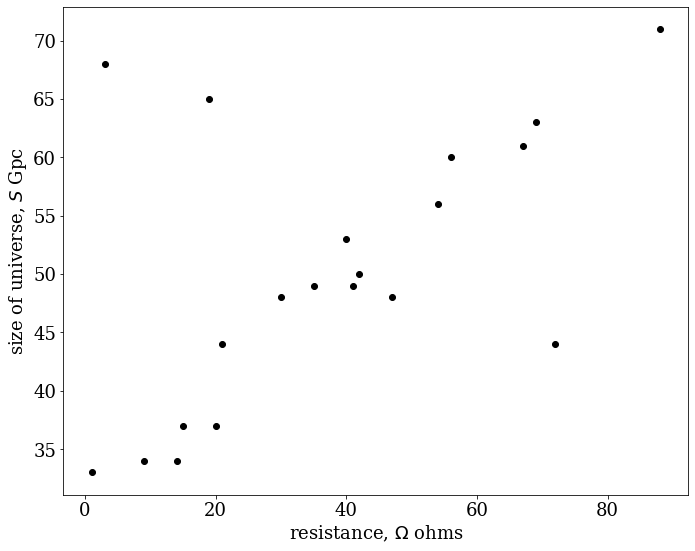

In [4]:
plt.plot(x, y, 'ok')
niceplot()

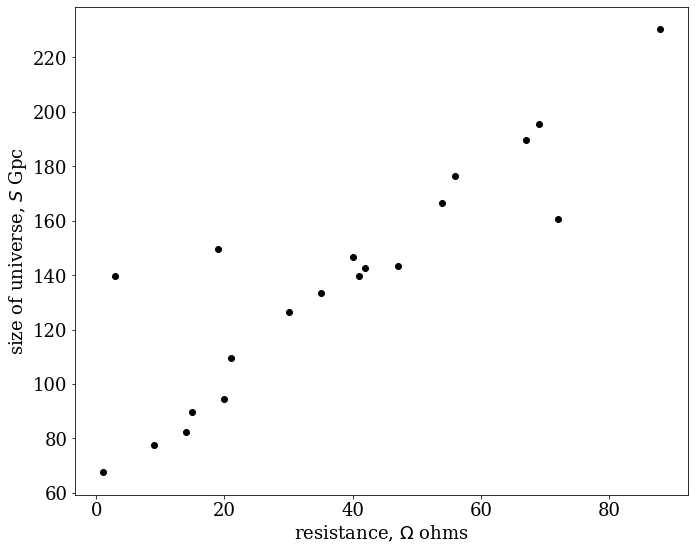

In [5]:
plt.plot(x, z, 'ok')
niceplot()

In [6]:
def model(p, a, b, c):
    x, y = p
    return a*x + b*y + c

In [7]:
result_fit, cov_fit = optimize.curve_fit(model, (x, y), z, absolute_sigma=True)
print(result_fit)

[1.  2.  0.5]


In [8]:
a, b, c = result_fit
xf = np.arange(x.min(), x.max(), 0.1)
yf = xf
zf = model((xf, yf), a, b, c)

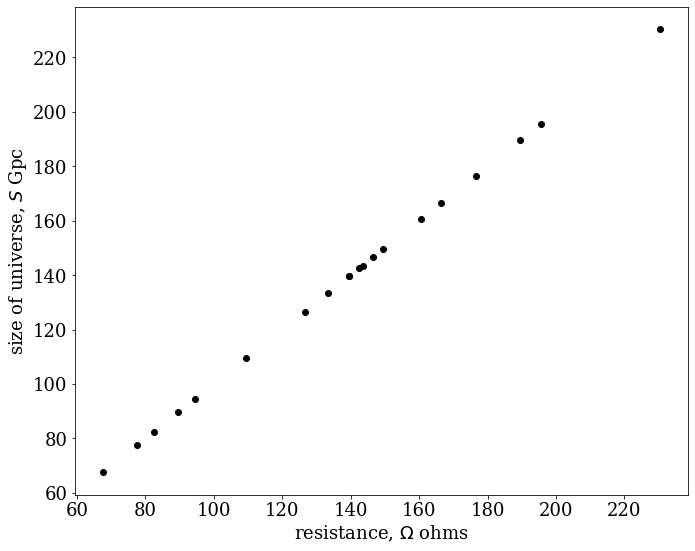

In [9]:
plt.plot(model((x, y), a, b, c), z, 'ok')
niceplot()